In [1]:
batch = 'Metaltail'
die = '21'
subdie = '14'
qubit_box = 'QBB46_2_6'
sample_name = 'IMEC-'+batch+'_Die'+die+'_Subdie'+subdie+'_'+qubit_box

# Leakage tests liveplot

In [2]:
import copy
import gc
import importlib
import math 
from math import floor 
import os
import re
import sys

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.cm as cmx
import numpy as np
import scipy

import pandas as pd
import json
import yaml
import imageio
try:
    import skimage
except:
    print("skimage not available. Try conda install scikit-image")

import qcodes as qc
print(qc.__file__)
import qcodes.dataset.experiment_container as exc
from qcodes.dataset.plotting import plot_by_id
from qcodes import initialise_database, load_by_id, \
    initialise_or_create_database_at, load_or_create_experiment

c:\Users\T4ACQ\miniconda3\envs\qcodes\lib\site-packages\qcodes\__init__.py


In [3]:
sofias_path = os.path.join('F:\\', 'qcodes_local', 'Sofia')

data_path = os.path.join('F:\\', 'qcodes_local', 'Sofia', 'IMEC', 'Metaltail', 
    '10.4. JellyBean-coupled double-DQD with SETs', 'Die21_Subdie14_QBB46_2_6', 'Week 10')

data_analysis_path = os.path.join(sofias_path, 'Data analysis tools') 
sys.path.insert(0, data_analysis_path)

device_schematic_name = "DQD_mediator_DQD_annotated_schematic.pdf"

In [4]:
from general_helpers import find_closest_index, find_matrix_extremum_indices, get_data_along_line, restack_zdata

from read_plot_qcodes_data import read_df_to_xyz, get_axis_name, \
    read_df_to_xy, find_run_ids, auto_read_to_xy, auto_read_to_xyz, \
    get_channel_voltage_from_snapshot, get_nice_label, \
    read_df_to_xz_traces, find_slow_variable_trace_indices

from plot_helpers import add_device_schematic_to_axis, get_requested_range

from analyze_lineshapes import estimate_full_width_half_maximum, find_max_slope_with_smoothing

from analyze_gate_turn_ons import find_threshold, find_threshold_and_saturation

from estimate_coulomb_diamonds import estimate_coulomb_diamonds, \
    estimate_charging_energies_lever_arms

from analyze_signal_to_noise import sweep_integration_time

from analyze_stability_maps import pair_points_to_lines 

from analyze_leakages import find_xaxis_matching_run_id, get_leakage_matrix

# Plot config

In [5]:
plt.rc('font',size=12)
plt.rc('axes',linewidth=1.5)
plt.rc('xtick',direction='in')
plt.rc('ytick',direction='in')
plt.rc('xtick.major',size=6,pad=10,width=1.5)
plt.rc('ytick.major',size=6,pad=10,width=1.5)
plt.rc('xtick.minor',size=4,pad=5,width=1.0)
plt.rc('ytick.minor',size=4,pad=5,width=1.0)

# Load database

In [6]:
initialise_or_create_database_at(os.path.join(data_path, 'Experiment databases', 
    sample_name+'_2022_05_15_leakage_tests.db'))

In [10]:
for exp in exc.experiments():
    print(exp.name, exp.sample_name)

leakage_matrix IMEC-Metaltail_Die21_Subdie14_QBB46_2_6


c:\Users\T4ACQ\miniconda3\envs\qcodes\lib\site-packages\qcodes\dataset\plotting.py:201: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


([<AxesSubplot:title={'center':'Run #1, Experiment leakage_matrix (IMEC-Metaltail_Die21_Subdie14_QBB46_2_6)'}, xlabel='V_top_left_confinement_ch_2 (mV)', ylabel='I_top_left_confinement_ch_2 (nA)'>,
  <AxesSubplot:title={'center':'Run #1, Experiment leakage_matrix (IMEC-Metaltail_Die21_Subdie14_QBB46_2_6)'}, xlabel='V_top_left_confinement_ch_2 (mV)', ylabel='I_top_right_confinement_ch_22 (pA)'>,
  <AxesSubplot:title={'center':'Run #1, Experiment leakage_matrix (IMEC-Metaltail_Die21_Subdie14_QBB46_2_6)'}, xlabel='V_top_left_confinement_ch_2 (mV)', ylabel='I_reservoir_gate_ch_18 (pA)'>,
  <AxesSubplot:title={'center':'Run #1, Experiment leakage_matrix (IMEC-Metaltail_Die21_Subdie14_QBB46_2_6)'}, xlabel='V_top_left_confinement_ch_2 (mV)', ylabel='I_reservoir_ohmic_ch_16 (pA)'>,
  <AxesSubplot:title={'center':'Run #1, Experiment leakage_matrix (IMEC-Metaltail_Die21_Subdie14_QBB46_2_6)'}, xlabel='V_top_left_confinement_ch_2 (mV)', ylabel='I_barrier_reservoir_Tplunger_ch_13 (pA)'>,
  <AxesSub

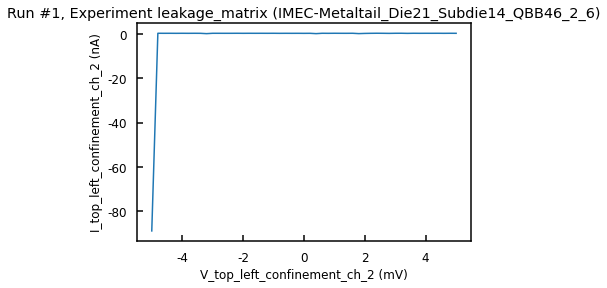

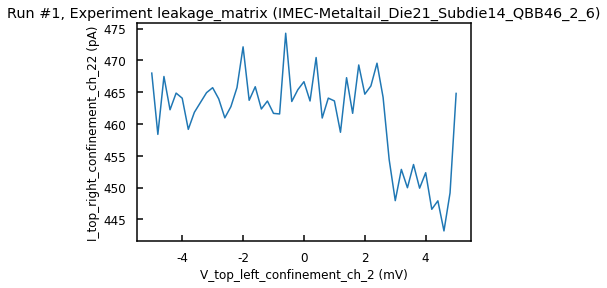

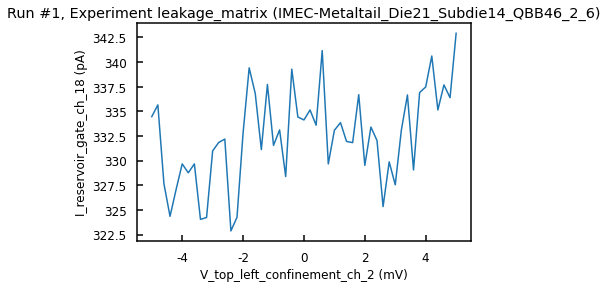

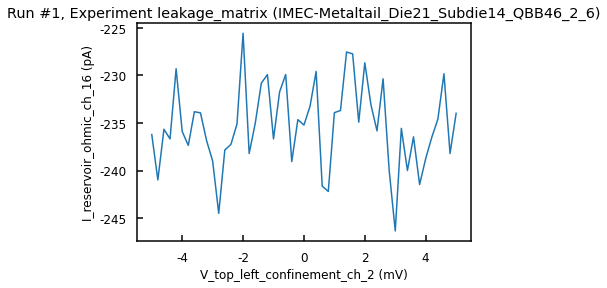

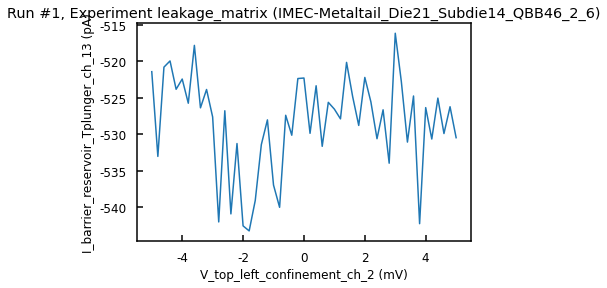

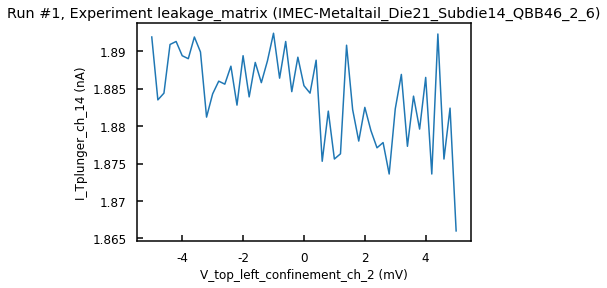

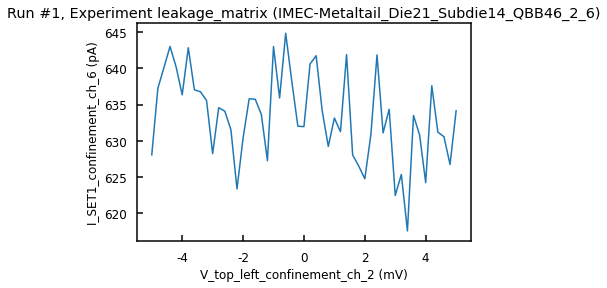

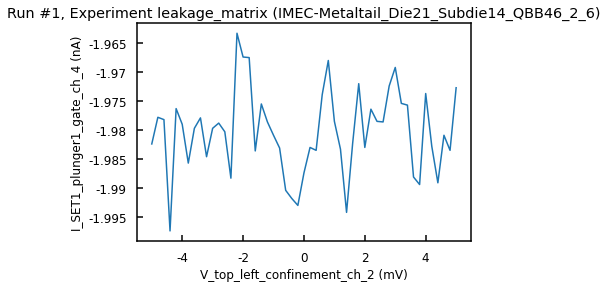

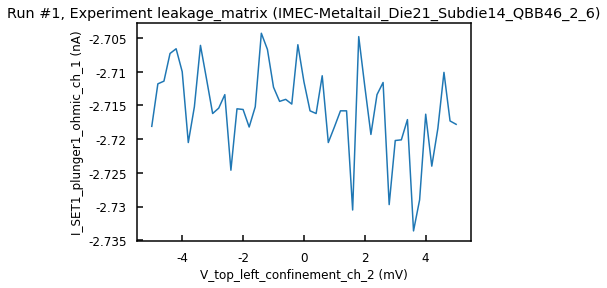

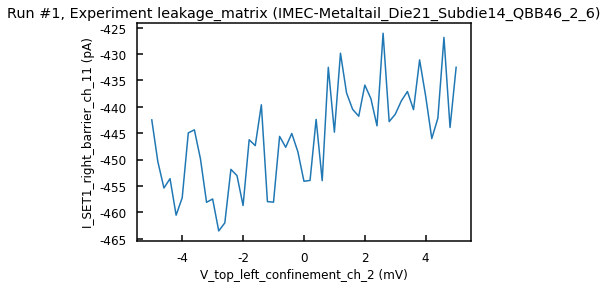

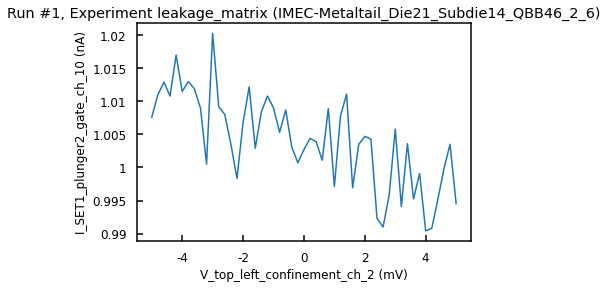

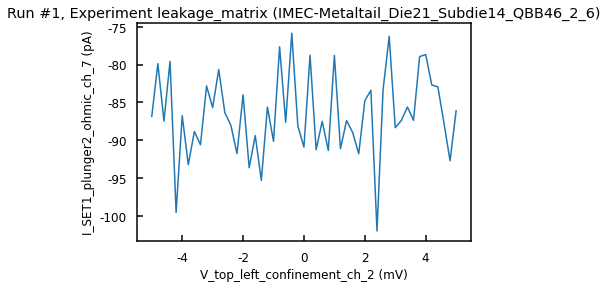

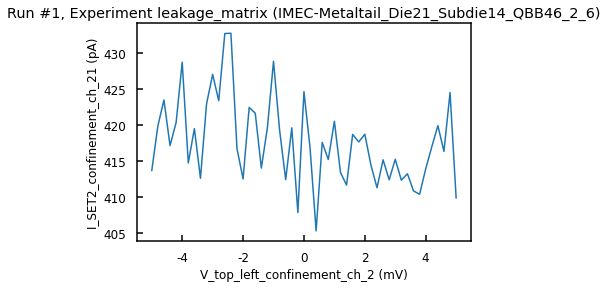

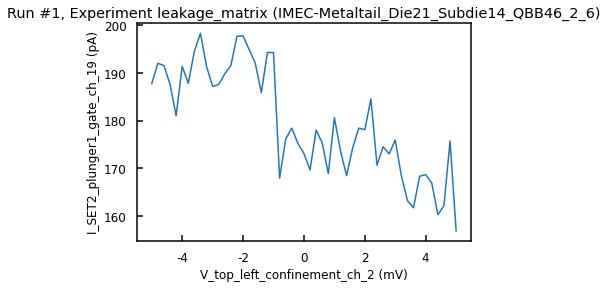

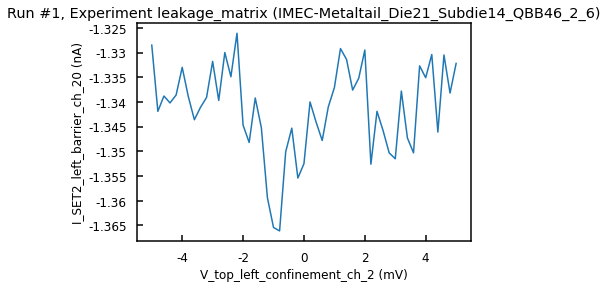

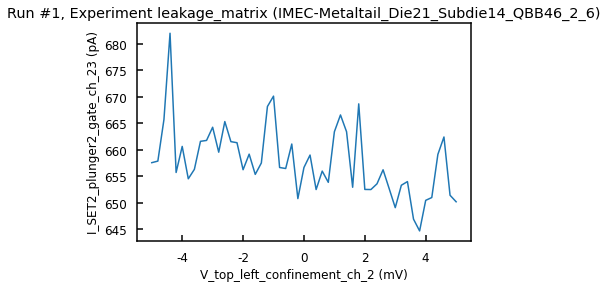

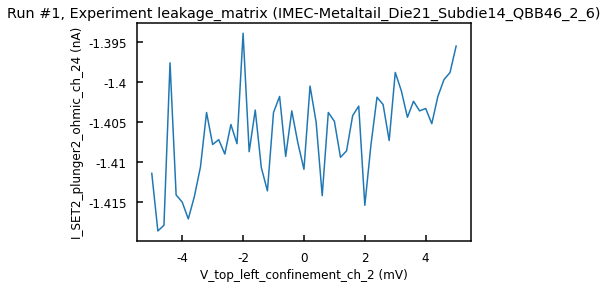

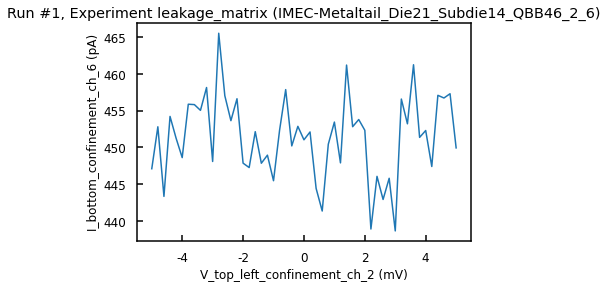

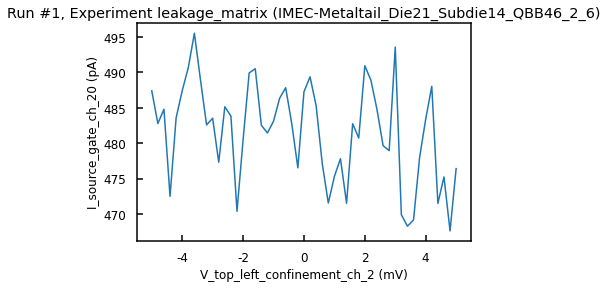

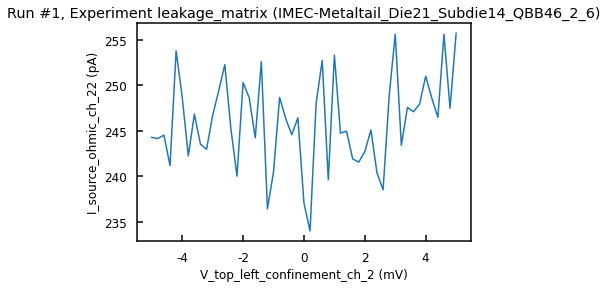

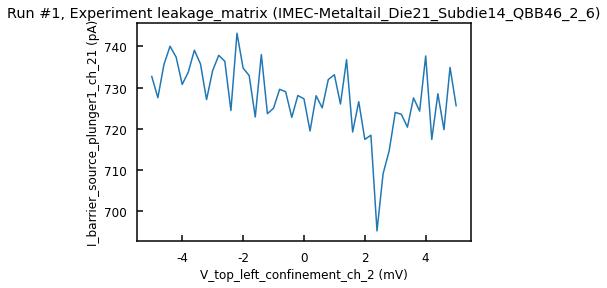

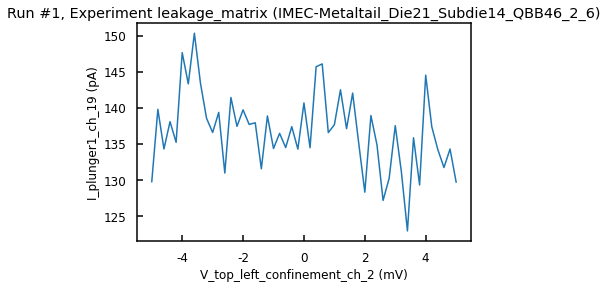

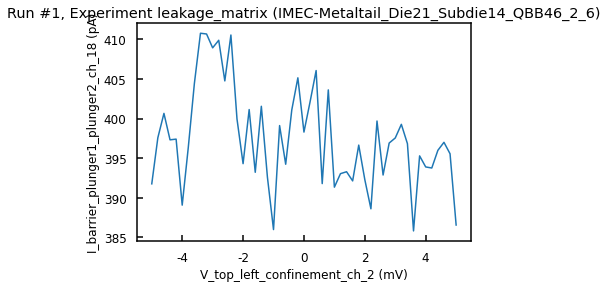

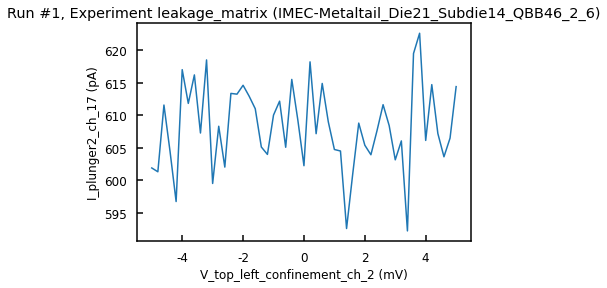

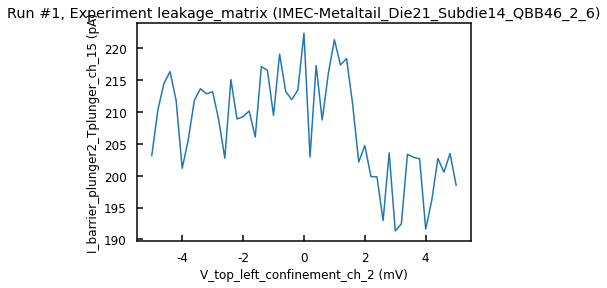

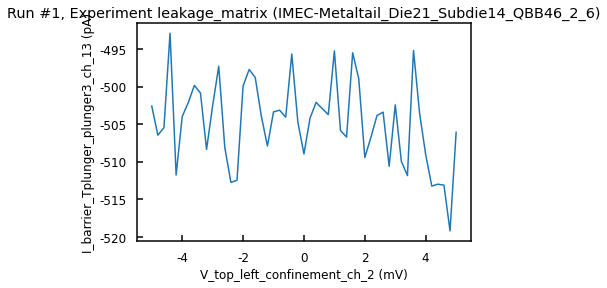

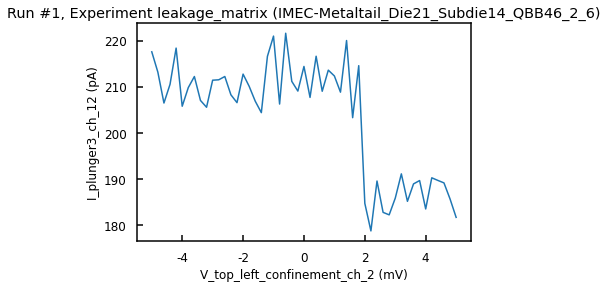

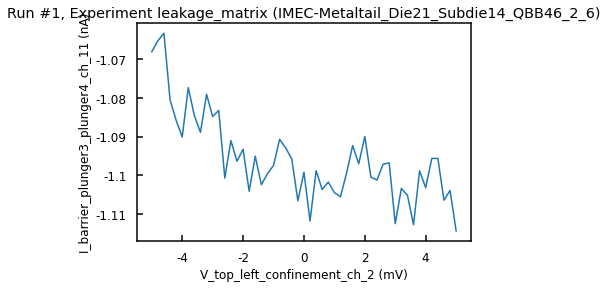

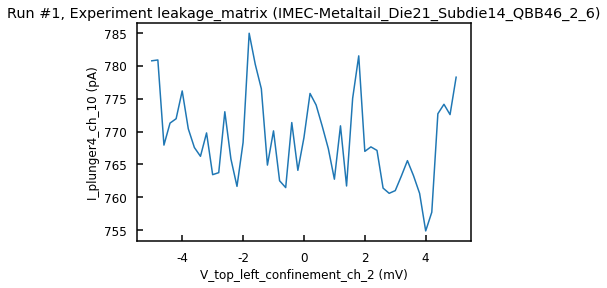

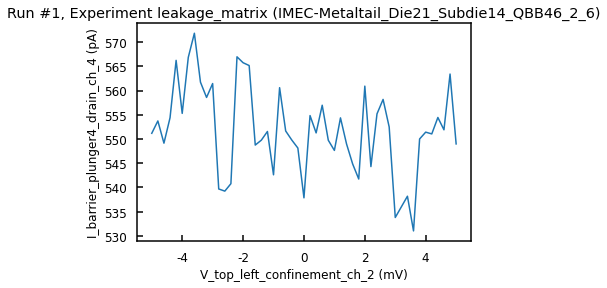

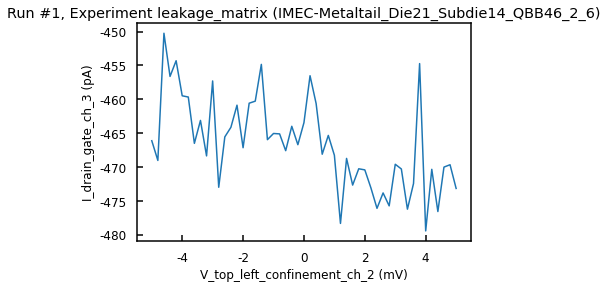

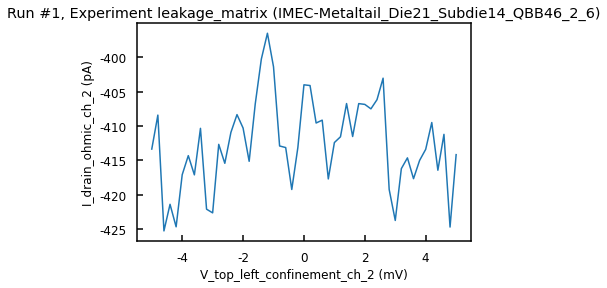

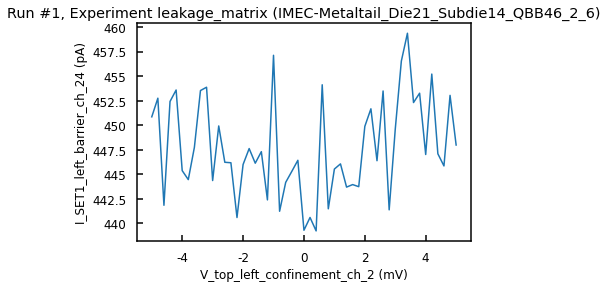

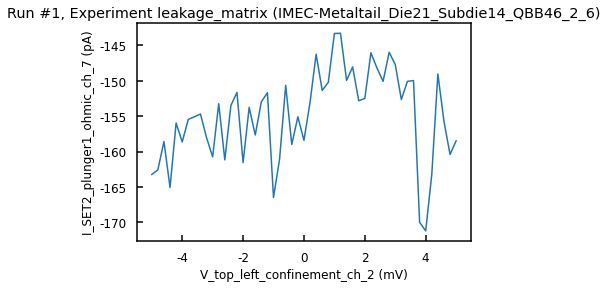

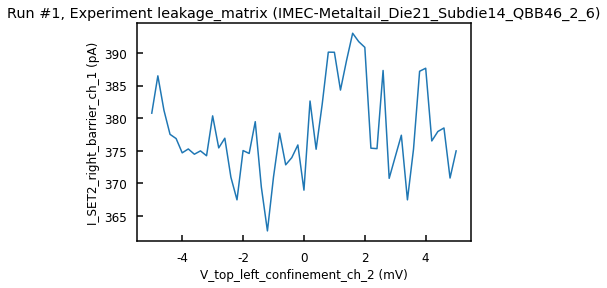

In [7]:
plot_by_id(1)

In [11]:
sample_name

'IMEC-Metaltail_Die21_Subdie14_QBB46_2_6'

# Plot leakage matrix

In [15]:
datasets = {}

In [18]:
run_ids = find_run_ids(exc, 
                       experiment_name='leakage_matrix', 
                       sample_name=sample_name)
print("found run_ids: ", run_ids)

found run_ids:  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']


In [19]:
for run_id in run_ids:
    datasets[run_id] = auto_read_to_xy(int(run_id))

C:\Users\T4ACQ\AppData\Local\Temp\ipykernel_20856\3597930851.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_axis.set_xticklabels(xticks, rotation='-90', fontsize=16)
C:\Users\T4ACQ\AppData\Local\Temp\ipykernel_20856\3597930851.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_axis.set_yticklabels(yticks, rotation='horizontal', fontsize=16)
C:\Users\T4ACQ\AppData\Local\Temp\ipykernel_20856\3597930851.py:63: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


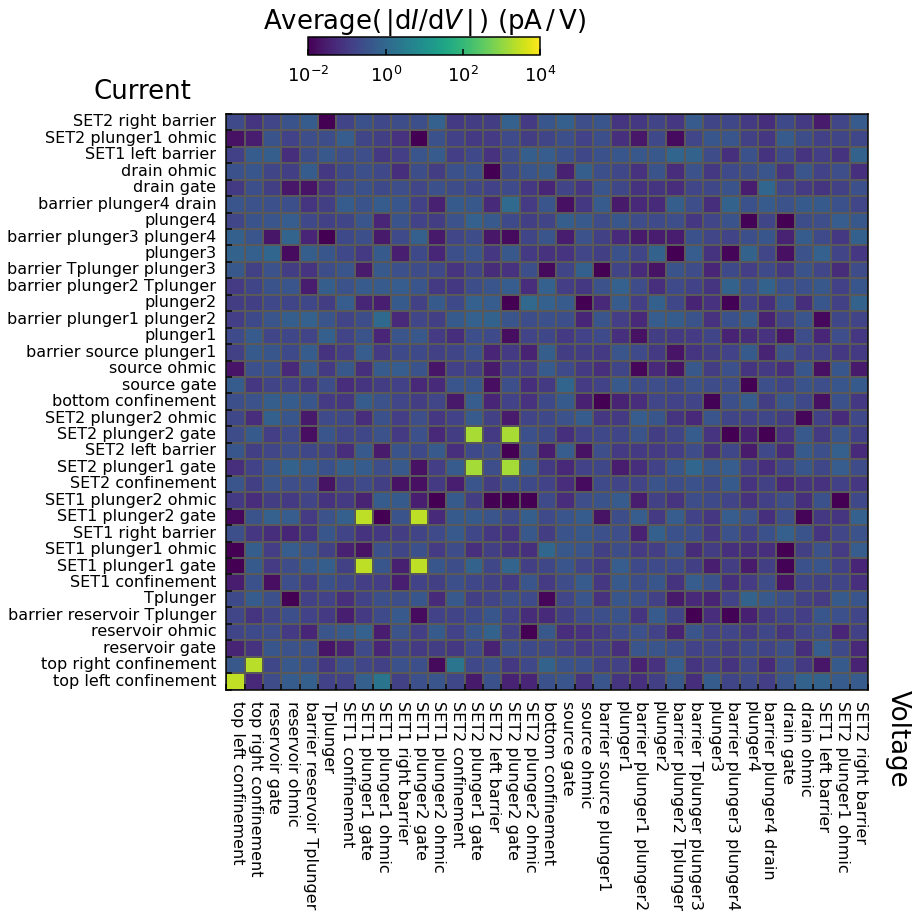

In [34]:
Aunits = 1e-12
Vunits = 1.0
#qb_box = 'QB16_6_5'
channel_indices, leakage_matrix = get_leakage_matrix(
    datasets, run_ids, Aunits=Aunits, Vunits=Vunits, vrange=[-0.005, 0.005])

cmin = 1e-2
cmax = 1e4

# fig = plt.figure(figsize=(14,14*1/(1-0.05)))
# grids = gs.GridSpec(2, 1, height_ratios=[0.05, 1])
# axs = []
# caxs = [] 
# axs.append(fig.add_subplot(grids[1, 0]))
# caxs.append(fig.add_subplot(grids[0, 0]))
fig = plt.figure(figsize=(11.5, 12.0))
grids = gs.GridSpec(2, 8, height_ratios=[0.03, 1.0])
plot_axis = fig.add_subplot(grids[1,:])
color_axis = fig.add_subplot(grids[0,1:4])
text_axis = fig.add_subplot(grids[0,4:])
text_axis.axis('off')

lm = leakage_matrix
lm = np.abs(lm)
epsilon = np.abs(lm.max() - lm.min())*1e-6
lm += epsilon

for data_label in run_ids:
    # Plot data
    im0 = plot_axis.pcolormesh(lm, shading='flat', edgecolor=cmx.gray(0.35), linewidth=1.5, 
        norm=matplotlib.colors.LogNorm(vmin=cmin, vmax=cmax))
    
    # Text ticks
    # Adjust tick density
    plot_axis.locator_params(axis="x", nbins=len(run_ids))
    plot_axis.locator_params(axis="y", nbins=len(run_ids))
    # Define and plot ticks
    xticks = list(channel_indices.keys())
    xticks = [xticks[i].replace('_',' ') for i in range(len(xticks))]
    yticks = copy.deepcopy(xticks)
    #yticks.reverse()
    plot_axis.set_xticklabels(xticks, rotation='-90', fontsize=16)
    plot_axis.set_yticklabels(yticks, rotation='horizontal', fontsize=16)
    # Adjust tick position
    dx = 0.15/len(run_ids)
    dy = 0. 
    xoffset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    yoffset = matplotlib.transforms.ScaledTranslation(dy, dx, fig.dpi_scale_trans)
    for label in plot_axis.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + xoffset)
    for label in plot_axis.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + yoffset)
    
# Plot colorbar
cb0 = fig.colorbar(im0, cax=color_axis, orientation='horizontal')
color_axis.set_title(r'Average($\, | \mathrm{d} I / \mathrm{d} V \, | \,$) (pA$\,/\,$V)', fontsize=26)
for t in cb0.ax.get_xticklabels():
    t.set_fontsize(18)

plt.text(-0.035, 0.81, "Current", fontsize=26, transform=plt.gcf().transFigure)
plt.text(0.92, 0.02, "Voltage", rotation=-90, fontsize=26, transform=plt.gcf().transFigure)

plt.tight_layout()
plt.savefig(os.path.join(data_path, "2022-05-15_leakage-tests", "Plots", "leakage_matrix_at_25mK.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(data_path, "2022-05-15_leakage-tests", "Plots", "leakage_matrix_at_25mK.png"), dpi=400, bbox_inches="tight")